In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd /content/drive/MyDrive/LADECO

/content/drive/MyDrive/LADECO


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 15 14:46:11 2021

@author: vy92naka
"""
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from thermograms.Utilities import Utilities
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from data_evaluation import Data_Evaluation

In [ ]:
main_dir = r'/content/sample_data'
root_path = r'/content/drive/MyDrive/LADECO/'
data_file_name = r'material_thickness_1000W.hdf5'
a = Utilities()
thermal_data,experiment_list=a.open_file(root_path, data_file_name,True)
    #experiment = '2021-05-11 - Variantenvergleich - VarioTherm Halogenlampe - Winkel 45°'
experiment_name=r'2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s'
experimental_data=thermal_data[experiment_name] 

Experiments in the file 

1  :  2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s
2  :  2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s
3  :  2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s
4  :  2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s
5  :  2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s
6  :  2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s
7  :  2021-12-07-Materialstudie-7.4-minS1013-1000W-10s
8  :  2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s
9  :  2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s
10  :  2021-12-07-Materialstudie-7.6-60µmS1013-1000W-10s
11  :  2021-12-07-Materialstudie-7.7-80µmS1013-1000W-10s
12  :  2021-12-07-Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-10s
13  :  2021-12-07-Materialstudie-8.3-40µmS1013_40 µmS3003rot-1000W-10s
14  :  2021-12-07-Materialstudie-8.4-40µmS101340µmS5010_blau-1000W-10s
15  :  2021-12-07-Materialstudie-8.5-40µmS1013_40µmS6018_grün-1000W-10s
16  :  2021-12-07-Materialstudie-8

In [ ]:
experiment_thickness=[]
for experiment in experiment_list.values():

  index=0
  thickness=0
  while True:
    index = experiment.find("µm",index+1)
    if index==-1:
      break
    thickness+=int(experiment[index-2:index])*0.001
  print(experiment,':',thickness)
  experiment_thickness.append(thickness)

2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s : 0.04
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s : 0.0
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.4-minS1013-1000W-10s : 0
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s : 0.02
2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s : 0.02
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-10s : 0.06
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-10s : 0.08
2021-12-07-Materialstudie-8.3-40µmS1013_40 µmS3003rot-1000W-10s : 0.04
2021-12-07-Materialstudie-8.4-40µmS101340µmS5010_blau-1000W-10s : 0.08
2021-12-07-Materialstudie-8.5-40µmS1013_40µmS6018_grün-1000W-10s : 0.08
2021-12-07-Materialstudie-8.6-40µmS1013_40µm_S9005_schwarz-10

In [ ]:
experiment_thickness[4]=0.04
experiment_thickness[12]=0.08

In [ ]:
number_of_classes=15

In [ ]:
bins=np.linspace(0.001,0.1,number_of_classes+1)

In [ ]:
bins

array([0.001 , 0.0076, 0.0142, 0.0208, 0.0274, 0.034 , 0.0406, 0.0472,
       0.0538, 0.0604, 0.067 , 0.0736, 0.0802, 0.0868, 0.0934, 0.1   ])

In [ ]:
count, _ = np.histogram(experiment_thickness, bins)

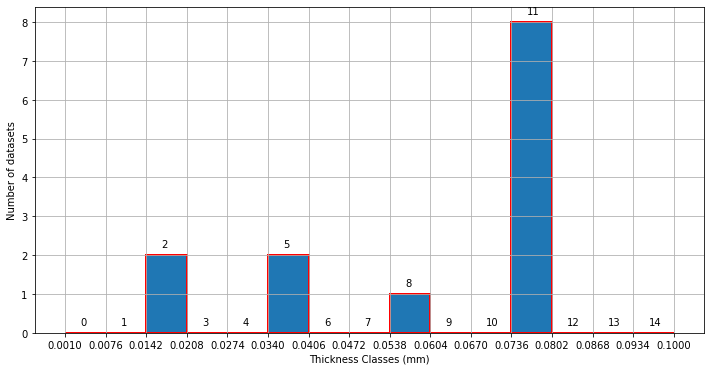

In [ ]:
decades = np.arange(1910, 2020, 10)
colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'cyan', 'yellow', 'lime']

plt.figure(figsize=(12,6))
plt.hist(experiment_thickness, bins, edgecolor='red',
              linewidth=2)
plt.xlabel('Thickness Classes (mm)')
plt.ylabel('Number of datasets')
plt.xticks(bins);
plt.grid()
i=0
for x,y in zip(bins,count):
  plt.text(x+0.0025, y+0.2, i, fontsize=10)
  i+=1
plt.savefig(r"/content/thickness_bins.png",dpi=100,bbox_inches='tight')

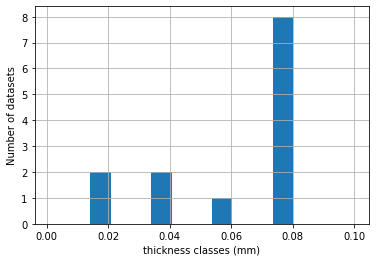

In [ ]:
plt.hist(experiment_thickness, bins)
plt.xlabel('thickness classes (mm)')
plt.ylabel('Number of datasets')
plt.grid()

In [ ]:
thickness_classes=np.digitize(experiment_thickness,bins)

In [ ]:
thickness_classes

array([ 0,  6, 12,  0,  6, 12,  0,  3,  3,  9, 12, 12, 12, 12, 12, 12,  0,
        0,  0])

In [ ]:
import tensorflow as tf 

In [ ]:
def principal_componant_analysis(data_set, no_EOF=1, plot_disp=False):
    if type(data_set) != 'ndarray':
        data_set = np.array(data_set)
    if len(data_set.shape) == 3:
        (m, n, t) = data_set.shape
        data_reshaped = data_set.reshape((m * n, t))
    else:
        (m, n) = data_set.shape
    pca = PCA(n_components=int(no_EOF))
    charactersitic_data = pca.fit_transform(data_reshaped)
    EOFs = charactersitic_data.reshape((m, n, no_EOF))
    if plot_disp:
        img1 = Image.fromarray(EOFs[:, :, 0].astype(np.int8))
        img2 = Image.fromarray(EOFs[:, :, 0].astype(np.float32))
        plt.imshow(img1)
    return EOFs

In [ ]:
EOF=principal_componant_analysis(np.array(experimental_data))

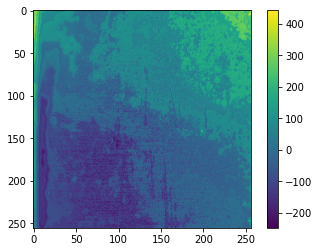

In [ ]:
plt.imshow(np.squeeze(EOF))
plt.colorbar()

In [ ]:
data=np.array(experimental_data)
fourier_transformation = np.fft.fftn(data, axes=(0, 1))
amplitude = np.abs(fourier_transformation)
amplitude_sequence = np.mean(amplitude, axis=(0, 1))
delta_amplitude = np.diff(amplitude_sequence)
#print(np.sort(delta_amplitude)[-5:])
#print(np.argsort(delta_amplitude)[-5:])
sorted = np.sort(delta_amplitude)
sorted_index = np.argsort(delta_amplitude)
if sorted_index[-1] > sorted_index[-2]:
    reflection_start_index = sorted_index[-2]
else:
    reflection_start_index = sorted_index[-1]

# reflection_start_index = np.argmax(delta_amplitude) + 5
reflection_start_index=reflection_start_index-5
reflection_end_index = np.argmin(delta_amplitude[:-5]) - 5
print(reflection_start_index, reflection_end_index)

272 659


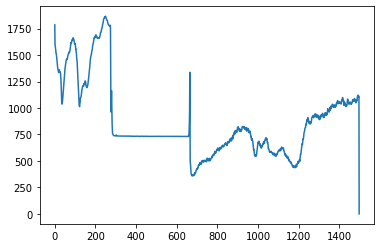

In [ ]:
plt.plot(amplitude_sequence)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
standardizing = MinMaxScaler(feature_range=(0, 1))

In [ ]:
input_data=data[35:-25,20:-35,:]-273.15
input_data=input_data[:,:,reflection_start_index-10:]

In [ ]:
std_output_data = standardizing.fit_transform(
                input_data.reshape(input_data.shape[0], -1)).reshape(input_data.shape)

In [ ]:
std_output_data.shape

(196, 201, 1236)

In [ ]:
-(reflection_start_index-reflection_end_index)

387

In [ ]:
normalized_data=std_output_data[:,:,(reflection_end_index-reflection_start_index)+10:(reflection_end_index-reflection_start_index)+10+200]

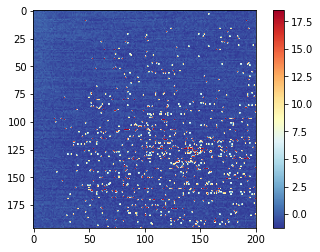

In [ ]:
plt.imshow(input_data[:,:,reflection_end_index].astype(np.float32),cmap='RdYlBu_r')
plt.colorbar()

In [ ]:
mean_inp=np.mean(std_output_data,axis=(0,1))

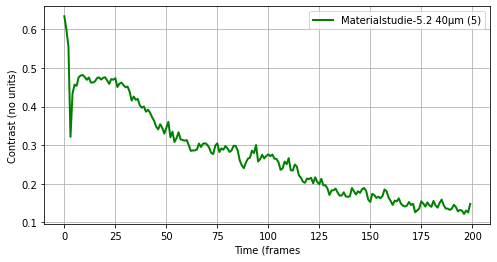

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(mean_inp[400:400+200],color='g',linewidth=2,label='Materialstudie-5.2 40µm (5)')
plt.grid()
plt.legend()
plt.xlabel('Time (frames')
plt.ylabel('Contrast (no units)')
plt.savefig(r"/content/thickness_40.png",dpi=600,bbox_inches='tight',transparent=True)

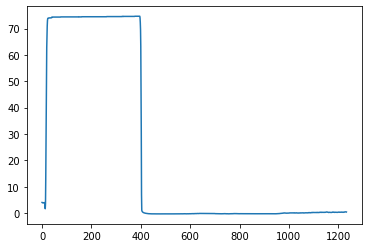

In [ ]:
mean_i=np.mean(input_data,axis=(0,1))
plt.plot(mean_i[:-2])

In [ ]:
model_input=tf.expand_dims(tf.expand_dims(mean_inp,axis=0),axis=0)

In [ ]:
model_input.shape

TensorShape([1, 1, 1236])

2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s
reflection_start_index: 334 reflection_end_index: 834
(200,)
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s
reflection_start_index: 273 reflection_end_index: 659
(200,)
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s
reflection_start_index: 428 reflection_end_index: 929
(200,)
2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s
reflection_start_index: 363 reflection_end_index: 725
(200,)
2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s
reflection_start_index: 469 reflection_end_index: 854
(200,)
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s
reflection_start_index: 390 reflection_end_index: 892
(200,)
2021-12-07-Materialstudie-7.4-minS1013-1000W-10s
reflection_start_index: 304 reflection_end_index: 804
(200,)
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s
reflection_start_index: 461 reflection_end_index: 960
(200,)
2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s
reflection_start_index: -

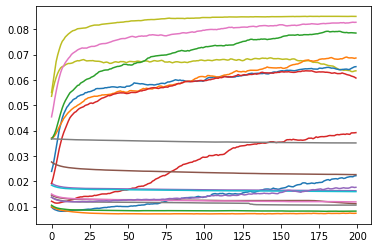

In [ ]:
x_crop_i=35
y_crop_i=25
x_crop_j=20
y_crop_j=35
no_of_time_steps=200
training_data=[]
for experiment in experiment_list.values():
  print(experiment)
  experimental_data=thermal_data[experiment] 
  data=np.array(experimental_data)
  fourier_transformation = np.fft.fftn(data, axes=(0, 1))
  amplitude = np.abs(fourier_transformation)
  amplitude_sequence = np.mean(data, axis=(0, 1))
  delta_amplitude = np.diff(amplitude_sequence)
  #print(np.sort(delta_amplitude)[-5:])
  #print(np.argsort(delta_amplitude)[-5:])
  sorted = np.sort(delta_amplitude)
  sorted_index = np.argsort(delta_amplitude)
  if sorted_index[-1] > sorted_index[-2]:
      reflection_start_index = sorted_index[-2]
  else:
      reflection_start_index = sorted_index[-1]

  # reflection_start_index = np.argmax(delta_amplitude) + 5
  reflection_start_index=reflection_start_index-5
  reflection_end_index = np.argmin(delta_amplitude[:-5]) - 5
  print('reflection_start_index:',reflection_start_index,'reflection_end_index:', reflection_end_index)
  based_temp=np.mean(input_data[:,:,10:reflection_start_index-10])
  input_data=data[x_crop_i:-y_crop_i,x_crop_j:-y_crop_j,:]
  #avg_data= input_data[:,:,reflection_end_index-20]
  #input_data=input_data[:,:,reflection_start_index+7:]
  #standardizing = MinMaxScaler(feature_range=(0, 1))
  #std_output_data = standardizing.fit_transform(
  #              input_data.reshape(input_data.shape[0], -1)).reshape(input_data.shape)
  id_data=(input_data[:,:,reflection_end_index+10:reflection_end_index+10+no_of_time_steps]-271)/271
  #reflection_length=(reflection_end_index-reflection_start_index)
  #normalized_data=std_output_data[:,:,reflection_length+10:reflection_length+10+no_of_time_steps]
  mean_inp=np.mean(id_data,axis=(0,1))
  plt.plot(mean_inp)
  #plt.legend(exp_list2,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  training_data.append(tf.expand_dims(tf.expand_dims(mean_inp,axis=0),axis=0))
  print(mean_inp.shape)
plt.savefig("/content/thermal_coating_thickness.png",dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
'''
x_crop_i=35
y_crop_i=25
x_crop_j=20
y_crop_j=35
no_of_time_steps=250
training_data=[]
for i,experiment in val_experiment_list.items():
  print(experiment)
  experimental_data=thermal_data[experiment] 
  data=np.array(experimental_data)
  fourier_transformation = np.fft.fftn(data, axes=(0, 1))
  amplitude = np.abs(fourier_transformation)
  amplitude_sequence = np.mean(data, axis=(0, 1))
  delta_amplitude = np.diff(amplitude_sequence)
  #print(np.sort(delta_amplitude)[-5:])
  #print(np.argsort(delta_amplitude)[-5:])
  sorted = np.sort(delta_amplitude)
  sorted_index = np.argsort(delta_amplitude)
  if sorted_index[-1] > sorted_index[-2]:
      reflection_start_index = sorted_index[-2]
  else:
      reflection_start_index = sorted_index[-1]

  # reflection_start_index = np.argmax(delta_amplitude) + 5
  reflection_start_index=reflection_start_index-5
  reflection_end_index = np.argmin(delta_amplitude[:-5]) - 5
  print('reflection_start_index:',reflection_start_index,'reflection_end_index:', reflection_end_index)
  based_temp=np.mean(input_data[:,:,10:reflection_start_index-10])
  input_data=data[x_crop_i:-y_crop_i,x_crop_j:-y_crop_j,:]
  standardizing = MinMaxScaler(feature_range=(0, 1))
  std_output_data = standardizing.fit_transform(
                input_data.reshape(input_data.shape[0], -1)).reshape(input_data.shape)
  normalized_data=std_output_data[:,:,reflection_end_index+6:reflection_end_index+6+no_of_time_steps]
  mean_inp=np.mean(normalized_data,axis=(0,1))
  plt.plot(mean_inp)
  
  plt.legend(experiment_list.values(),bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  training_data.append(tf.expand_dims(tf.expand_dims(mean_inp,axis=0),axis=0))
x_train_ds=tf.concat(training_data,axis=0)
'''

"\nx_crop_i=35\ny_crop_i=25\nx_crop_j=20\ny_crop_j=35\nno_of_time_steps=250\ntraining_data=[]\nfor i,experiment in val_experiment_list.items():\n  print(experiment)\n  experimental_data=thermal_data[experiment] \n  data=np.array(experimental_data)\n  fourier_transformation = np.fft.fftn(data, axes=(0, 1))\n  amplitude = np.abs(fourier_transformation)\n  amplitude_sequence = np.mean(data, axis=(0, 1))\n  delta_amplitude = np.diff(amplitude_sequence)\n  #print(np.sort(delta_amplitude)[-5:])\n  #print(np.argsort(delta_amplitude)[-5:])\n  sorted = np.sort(delta_amplitude)\n  sorted_index = np.argsort(delta_amplitude)\n  if sorted_index[-1] > sorted_index[-2]:\n      reflection_start_index = sorted_index[-2]\n  else:\n      reflection_start_index = sorted_index[-1]\n\n  # reflection_start_index = np.argmax(delta_amplitude) + 5\n  reflection_start_index=reflection_start_index-5\n  reflection_end_index = np.argmin(delta_amplitude[:-5]) - 5\n  print('reflection_start_index:',reflection_start_i

In [ ]:
import tensorflow as tf
thickness_model_di_gru=tf.keras.Sequential([
                               tf.keras.layers.Input(shape=(1,no_of_time_steps))
                               ,tf.keras.layers.Bidirectional(tf.keras.layers.GRU(512,return_sequences=True,dropout=0.1))
                               #,tf.keras.layers.GRU(512,return_sequences=True,dropout=0.2)
                               ,tf.keras.layers.GRU(256,return_sequences=True,dropout=0.1)
                               ,tf.keras.layers.GRU(128)
                               ,tf.keras.layers.Dense(256,activation='relu')
                               ,tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
import tensorflow as tf
thickness_model_gru=tf.keras.Sequential([
                               tf.keras.layers.Input(shape=(1,no_of_time_steps))
                               ,tf.keras.layers.GRU(512,return_sequences=True,dropout=0.2)
                               ,tf.keras.layers.GRU(512,return_sequences=True,dropout=0.2)
                               ,tf.keras.layers.GRU(256,return_sequences=True,dropout=0.1)
                               ,tf.keras.layers.GRU(128)
                               ,tf.keras.layers.Dense(256,activation='relu')
                               ,tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
import tensorflow as tf
thickness_model_lstm=tf.keras.Sequential([
                               tf.keras.layers.Input(shape=(1,no_of_time_steps))
                               ,tf.keras.layers.LSTM(512,return_sequences=True,dropout=0.2)
                               ,tf.keras.layers.LSTM(512,return_sequences=True,dropout=0.2)
                               ,tf.keras.layers.LSTM(256,return_sequences=True,dropout=0.1)
                               ,tf.keras.layers.LSTM(128)
                               ,tf.keras.layers.Dense(256,activation='relu')
                               ,tf.keras.layers.Dense(number_of_classes,activation='softmax')
])

In [ ]:
x_train_ds=tf.concat(training_data,axis=0)

In [ ]:
y_train_ds=tf.one_hot(thickness_classes,number_of_classes)

In [ ]:
x_train_ds.shape,y_train_ds.shape

(TensorShape([19, 1, 200]), TensorShape([19, 15]))

In [ ]:
thickness_model_di_gru.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.losses.categorical_crossentropy,
                        metrics=['accuracy'])

In [ ]:
thickness_model_gru.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.losses.categorical_crossentropy,
                        metrics=['accuracy'])

In [ ]:
from sklearn.utils import class_weight

In [ ]:
weights=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(thickness_classes),y=thickness_classes)

In [ ]:
inbalanced_weight=dict(zip(np.unique(thickness_classes),weights))

In [ ]:
inbalanced_weight

{0: 0.6333333333333333, 3: 1.9, 6: 1.9, 9: 3.8, 12: 0.475}

In [ ]:
for i in range(number_of_classes):
  if i in inbalanced_weight:
    continue
  else:
    inbalanced_weight[i]=0.0

In [ ]:
inbalanced_weight

{0: 0.6333333333333333,
 1: 0.0,
 2: 0.0,
 3: 1.9,
 4: 0.0,
 5: 0.0,
 6: 1.9,
 7: 0.0,
 8: 0.0,
 9: 3.8,
 10: 0.0,
 11: 0.0,
 12: 0.475,
 13: 0.0,
 14: 0.0}

In [ ]:
stopping_criteria=tf.keras.callbacks.EarlyStopping(monitor='accuracy', baseline=0.90, patience=5)

In [ ]:
model_history_di_gru=thickness_model_di_gru.fit(x_train_ds,y_train_ds,epochs=500,class_weight=inbalanced_weight,shuffle=True,batch_size=8
                                                )

Epoch 1/500
3/3 [==============================] - 9s 12ms/step - loss: 2.7055 - accuracy: 0.0526
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 2.6525 - accuracy: 0.4211
Epoch 3/500
3/3 [==============================] - 0s 7ms/step - loss: 2.5361 - accuracy: 0.4211
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 2.2906 - accuracy: 0.4211
Epoch 5/500
3/3 [==============================] - 0s 6ms/step - loss: 2.0013 - accuracy: 0.4211
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 1.8777 - accuracy: 0.4211
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 1.7675 - accuracy: 0.4211
Epoch 8/500
3/3 [==============================] - 0s 6ms/step - loss: 1.6872 - accuracy: 0.3158
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 1.6426 - accuracy: 0.1053
Epoch 10/500
3/3 [==============================] - 0s 6ms/step - loss: 1.6287 - accuracy: 0.0526
Epoch 11/500
3/3 [==========

In [ ]:
model_history_gru=thickness_model_gru.fit(x_train_ds,y_train_ds,epochs=500,class_weight=inbalanced_weight,shuffle=True,batch_size=8
                                                )

Epoch 1/500
3/3 [==============================] - 5s 8ms/step - loss: 2.7048 - accuracy: 0.0526 
Epoch 2/500
3/3 [==============================] - 0s 7ms/step - loss: 2.6753 - accuracy: 0.3158
Epoch 3/500
3/3 [==============================] - 0s 7ms/step - loss: 2.5941 - accuracy: 0.3158
Epoch 4/500
3/3 [==============================] - 0s 7ms/step - loss: 2.3872 - accuracy: 0.3158
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 2.0425 - accuracy: 0.3158
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 1.8666 - accuracy: 0.3158
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 1.7698 - accuracy: 0.4211
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 1.6632 - accuracy: 0.3684
Epoch 9/500
3/3 [==============================] - 0s 7ms/step - loss: 1.6241 - accuracy: 0.2632
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 1.5998 - accuracy: 0.2632
Epoch 11/500
3/3 [==========

In [ ]:
model_para=model_history_di_gru.history

In [ ]:
import pickle

# define dictionary

# create a binary pickle file 
f = open("/content/thickness_gru_03_dp.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(model_para,f)
# close file
f.close()

In [ ]:
thickness_model_di_gru.evaluate(x_train_ds,y_train_ds)

1/1 [==============================] - 1s 1s/step - loss: 0.3217 - accuracy: 0.8947


[0.3216582238674164, 0.8947368264198303]

In [ ]:
y_predicted=thickness_model_di_gru.predict_on_batch(x_train_ds)

In [ ]:
thickness_classes,np.argmax(y_predicted,axis=1)

(array([ 0,  6, 12,  0,  6, 12,  0,  3,  3,  9, 12, 12, 12, 12, 12, 12,  0,
         0,  0]),
 array([ 0,  6, 12,  0,  9, 12,  0,  3,  3,  9, 12, 12, 12, 12, 12, 12,  0,
         0,  3]))

In [ ]:
x_train_ds.shape

TensorShape([19, 1, 200])

In [ ]:
2021-12-07-Materialstudie-5.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-10s : 0.04
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.1-EW38-505-1000W-10s : 0
2021-12-07-Materialstudie-7.2-EW38-505_40 µmS1013-1000W-10s : 0.0
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-7.4-minS1013-1000W-10s : 0
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-10s : 0.02
2021-12-07-Materialstudie-7.5-20µmS1013-150W-10s : 0.02
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-10s : 0.06
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-10s : 0.08
2021-12-07-Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-10s : 0.08
2021-12-07-Materialstudie-8.3-40µmS1013_40 µmS3003rot-1000W-10s : 0.04
2021-12-07-Materialstudie-8.4-40µmS101340µmS5010_blau-1000W-10s : 0.08
2021-12-07-Materialstudie-8.5-40µmS1013_40µmS6018_grün-1000W-10s : 0.08
2021-12-07-Materialstudie-8.6-40µmS1013_40µm_S9005_schwarz-1000W-10s : 0.08
2021-12-07-Materialstudie-C1-Calzinitischer_Beton-1000W-10s : 0
2021-12-07-Materialstudie-L3-Laserbehandelte_Probe-1000W-10s : 0
2021-12-07-Materialstudie-S1-Silikatischer_Beton-1000W-10s : 0

In [ ]:
thickness_classes
y_pred=np.argmax(y_predicted,axis=1)

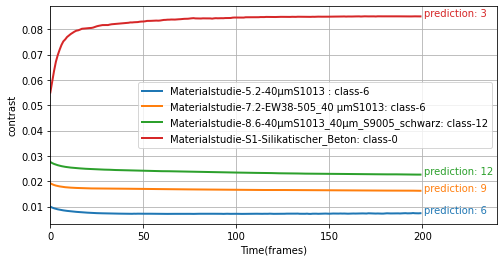

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(np.squeeze(x_train_ds[1,:,:]),label="Materialstudie-5.2-40µmS1013 : class-"+str(thickness_classes[1]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[4,:,:]),label="Materialstudie-7.2-EW38-505_40 µmS1013: class-"+str(thickness_classes[4]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[-4,:,:]),label="Materialstudie-8.6-40µmS1013_40µm_S9005_schwarz: class-"+str(thickness_classes[-4]),linewidth=2)
plt.plot(np.squeeze(x_train_ds[-1,:,:]),label="Materialstudie-S1-Silikatischer_Beton: class-"+str(thickness_classes[-1]),linewidth=2)

plt.legend()
plt.text(201,np.squeeze(x_train_ds[1,:,-1]),'prediction: '+str(y_pred[1]),color='tab:blue')
plt.text(201,np.squeeze(x_train_ds[4,:,-1]),'prediction: '+str(y_pred[4]),color='tab:orange')
plt.text(201,np.squeeze(x_train_ds[-4,:,-1]),'prediction: '+str(y_pred[-4]),color='tab:green')
plt.text(201,np.squeeze(x_train_ds[-1,:,-1]),'prediction: '+str(y_pred[-1]),color='tab:red')
plt.xlabel('Time(frames)')
plt.ylabel('contrast')
plt.grid()
plt.xlim(0,240)
plt.savefig("/content/thermal_coating_thickness_1.png",dpi=100,bbox_inches='tight',transparent=True)

In [ ]:
thickness_model_di_gru.save('/content/thickness_estimation_GRU_av_con.h5')

In [ ]:
model_history2=thickness_model2.fit(x_train_ds,y_train_ds,batch_size=8,epochs=2000,class_weight=inbalanced_weight,shuffle=True)

Epoch 1/2000
3/3 [==============================] - 5s 8ms/step - loss: 2.7066 - accuracy: 0.0526
Epoch 2/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.6913 - accuracy: 0.4211
Epoch 3/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.6763 - accuracy: 0.4211
Epoch 4/2000
3/3 [==============================] - 0s 9ms/step - loss: 2.6563 - accuracy: 0.4211
Epoch 5/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.6188 - accuracy: 0.4211
Epoch 6/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.5415 - accuracy: 0.4211
Epoch 7/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.3596 - accuracy: 0.4211
Epoch 8/2000
3/3 [==============================] - 0s 7ms/step - loss: 2.1092 - accuracy: 0.4211
Epoch 9/2000
3/3 [==============================] - 0s 7ms/step - loss: 1.8482 - accuracy: 0.4211
Epoch 10/2000
3/3 [==============================] - 0s 7ms/step - loss: 1.7421 - accuracy: 0.3684
Epoch 11/2000
3/3 [

In [ ]:
thickness_model.save('/content/drive/MyDrive/LADECO/Models/thickness_estimation/thickness_estimation_LSTM.h5')

In [ ]:
j=1
pr=np.expand_dims(x_train_ds[j,:,:],axis=0)
thickness=thickness_model.predict(pr)
index=np.argmax(thickness)
index,experiment_thickness[j]

(6, 0.04)

In [ ]:
j=6
pr=np.expand_dims(x_train_ds[j,:,:],axis=0)
thickness=thickness_model2.predict(pr)
index=np.argmax(thickness)
index,experiment_thickness[j]

(0, 0)

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C = 1000)
svr.fit(x_train_ds,thickness_classes)

In [ ]:
model_para=model_history.history

In [ ]:
import pickle

# define dictionary

# create a binary pickle file 
f = open("/content/drive/MyDrive/LADECO/Models/thickness_estimation/thickness_estimation_GRU_model.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(model_para,f)
# close file
f.close()

In [ ]:
model_para2=model_history2.history

In [ ]:
import pickle

# define dictionary

# create a binary pickle file 
f = open("/content/drive/MyDrive/LADECO/Models/thickness_estimation/thickness_estimation_LSTM_model.pkl","wb")

# write the python object (dict) to pickle file
pickle.dump(model_para2,f)
# close file
f.close()

In [ ]:
main_dir = r'/content/sample_data'
root_path = r'/content/drive/MyDrive/LADECO/'
data_file_name = r'material_thickness_1000W_5s.hdf5'
a = Utilities()
thermal_data1,experiment_test_list=a.open_file(root_path, data_file_name,True)
    #experiment = '2021-05-11 - Variantenvergleich - VarioTherm Halogenlampe - Winkel 45°'
experiment_name=r'2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s'
experimental_data=thermal_data1[experiment_name] 

Experiments in the file 

1  :  2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s
2  :  2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s
3  :  2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s
4  :  2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s
5  :  2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s
6  :  2021-12-07-Materialstudie-7.4-minS1013-1000W-5s
7  :  2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s
8  :  2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s
9  :  2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s
10  :  2021-12-07-Materialstudie-8.3-40µmS1013_40µmS3003rot-1000W-5s
11  :  2021-12-07-Materialstudie-8.4-40µmS1013_40µmS5010blau-1000W-5s
12  :  2021-12-07-Materialstudie-8.5-40µmS1013_40µm_S6018grün-1000W-5s
13  :  2021-12-07-Materialstudie-8.6-40µmS1013_40µmS9005schwarz-1000W-5s


A total of 13 experiments are loaded in file  



2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s
reflection_start_index: 458 reflection_end_index: 707
(200,)
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s
reflection_start_index: 450 reflection_end_index: 701
(200,)
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s
reflection_start_index: 451 reflection_end_index: 700
(200,)
2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s
reflection_start_index: 494 reflection_end_index: 744
(200,)
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s
reflection_start_index: 439 reflection_end_index: 691
(200,)
2021-12-07-Materialstudie-7.4-minS1013-1000W-5s
reflection_start_index: 383 reflection_end_index: 634
(200,)
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s
reflection_start_index: 463 reflection_end_index: 713
(200,)
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s
reflection_start_index: 393 reflection_end_index: 644
(200,)
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s
reflection_start_

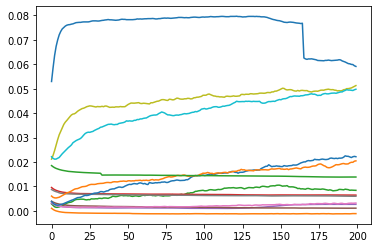

In [ ]:
x_crop_i=35
y_crop_i=25
x_crop_j=20
y_crop_j=35
no_of_time_steps=200
testing_data=[]
for experiment in experiment_test_list.values():
  print(experiment)
  experimental_data=thermal_data1[experiment] 
  data=np.array(experimental_data)
  fourier_transformation = np.fft.fftn(data, axes=(0, 1))
  amplitude = np.abs(fourier_transformation)
  amplitude_sequence = np.mean(data, axis=(0, 1))
  delta_amplitude = np.diff(amplitude_sequence)
  #print(np.sort(delta_amplitude)[-5:])
  #print(np.argsort(delta_amplitude)[-5:])
  sorted = np.sort(delta_amplitude)
  sorted_index = np.argsort(delta_amplitude)
  if sorted_index[-1] > sorted_index[-2]:
      reflection_start_index = sorted_index[-2]
  else:
      reflection_start_index = sorted_index[-1]

  # reflection_start_index = np.argmax(delta_amplitude) + 5
  reflection_start_index=reflection_start_index-5
  reflection_end_index = np.argmin(delta_amplitude[:-5]) - 5
  print('reflection_start_index:',reflection_start_index,'reflection_end_index:', reflection_end_index)
  based_temp=np.mean(input_data[:,:,10:reflection_start_index-10])
  input_data=data[x_crop_i:-y_crop_i,x_crop_j:-y_crop_j,:]
  #standardizing = MinMaxScaler(feature_range=(0, 1))
  #std_output_data = standardizing.fit_transform(
  #              input_data.reshape(input_data.shape[0], -1)).reshape(input_data.shape)
  #outp=np.mean(std_output_data,axis=(0,1))
  #plt.plot(outp)
  #std_output_data=std_output_data[:,:,reflection_start_index+7:]
  id_data=(input_data[:,:,reflection_end_index+10:reflection_end_index+10+no_of_time_steps]-273.15)/273.15
  #reflection_length=(reflection_end_index-reflection_start_index)
  #normalized_data=std_output_data[:,:,reflection_length+10:reflection_length+10+no_of_time_steps]
  mean_inp=np.mean(id_data,axis=(0,1))
  outp=np.mean(id_data,axis=(0,1))
  plt.plot(outp)
  #plt.legend(exp_list2,bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  testing_data.append(tf.expand_dims(tf.expand_dims(mean_inp,axis=0),axis=0))
  print(mean_inp.shape)
plt.savefig("/content/thermal_coating_thickness.png",dpi=600,bbox_inches='tight',transparent=True)

In [ ]:
experiment_test_thickness=[]
for experiment in experiment_test_list.values():

  index=0
  thickness=0
  while True:
    index = experiment.find("µm",index+1)
    if index==-1:
      break
    thickness+=int(experiment[index-2:index])*0.001
  print(experiment,':',thickness)
  experiment_test_thickness.append(thickness)

2021-12-07 -Materialstudie-8.2-40µmS1013_40µmS1021gelb-1000W-5s : 0.08
2021-12-07-Materialstudie-5.2-40µmS1013-1000W-5s : 0.04
2021-12-07-Materialstudie-5.3-40µm_S1013_40µm_S1013-1000W-5s : 0.08
2021-12-07-Materialstudie-7.2-EW38-505_40µmS1013-1000W-5s : 0.04
2021-12-07-Materialstudie-7.3-EW38-505_40µmS1013_40µmS1013-1000W-5s : 0.08
2021-12-07-Materialstudie-7.4-minS1013-1000W-5s : 0
2021-12-07-Materialstudie-7.5-20µmS1013-1000W-5s : 0.02
2021-12-07-Materialstudie-7.6-60µmS1013-1000W-5s : 0.06
2021-12-07-Materialstudie-7.7-80µmS1013-1000W-5s : 0.08
2021-12-07-Materialstudie-8.3-40µmS1013_40µmS3003rot-1000W-5s : 0.08
2021-12-07-Materialstudie-8.4-40µmS1013_40µmS5010blau-1000W-5s : 0.08
2021-12-07-Materialstudie-8.5-40µmS1013_40µm_S6018grün-1000W-5s : 0.08
2021-12-07-Materialstudie-8.6-40µmS1013_40µmS9005schwarz-1000W-5s : 0.08


In [ ]:
thickness_classes=np.digitize(experiment_test_thickness,bins)

In [ ]:
x_test_ds=tf.concat(testing_data,axis=0)

In [ ]:
y_test_ds=tf.one_hot(thickness_classes,number_of_classes)

In [ ]:
thickness_model.evaluate(x_test_ds,y_test_ds)

1/1 [==============================] - 0s 19ms/step - loss: 2.7586 - accuracy: 0.5385


[2.7586283683776855, 0.5384615659713745]

In [ ]:
thickness_model2.evaluate(x_test_ds,y_test_ds)

1/1 [==============================] - 1s 1s/step - loss: 2.6236 - accuracy: 0.5385


[2.6236393451690674, 0.5384615659713745]

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel = 'linear',C = 1000)
svr.fit(X_train_std,thickness_classes)